In [16]:
from matplotlib import pyplot as plt
import numpy as np
import json
import os

In [17]:
usages = [x for x in os.listdir() if x.endswith('-usage.json')]

In [27]:
raw = {}
for name in usages:
    with open(name, 'r') as f:
        raw[name] = json.load(f)
list(raw.values())[0][0].keys()

dict_keys(['ppid', 'pid', 'ctime', 'cpu', 'timestamp', 'elapsed', 'memory'])

In [32]:
cpus = {
    x: np.array([z['cpu'] for z in y])
    for x,y in raw.items()
}
mems = {
    x: np.array([z['memory'] for z in y])
    for x,y in raw.items()
}
ctimes = {
    x: np.array([z['ctime'] for z in y])
    for x,y in raw.items()
}

/Users/zyu/default-py3env/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


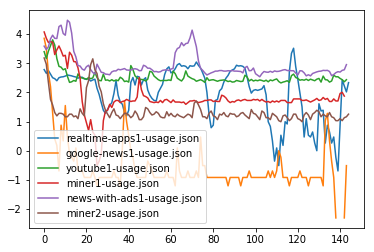

In [36]:
for name, cpu in cpus.items():
    plt.plot(np.log(cpu), label=name)
plt.legend()
plt.show()

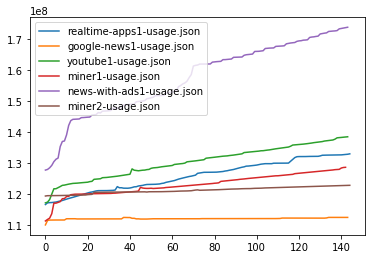

In [38]:
for name, val in mems.items():
    plt.plot(val, label=name)
plt.legend()
plt.show()

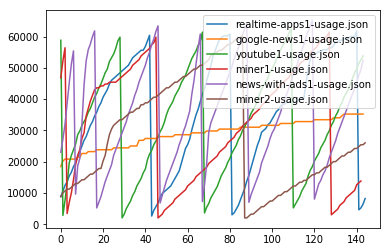

In [40]:
for name, val in ctimes.items():
    plt.plot(val, label=name)
plt.legend()
plt.show()